<a href="https://colab.research.google.com/github/lexijack/507/blob/main/Gerrymandering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **http://tinyurl.com/gerry507**

So far in our programming education we have primarily completed tasks that are easily handled through basic data structures such as strings, lists, tuples, dictionaries, and eventually dataframes. Over the following weeks we will introduce a series of advanced data structures. First, I want to motivate this unit, by examining a problem that is not easily solved with the data structures we have so far.

On February 2nd the Michigan Independent Redistricting Commission published the following draft maps https://www.michigan.gov/micrc/mapping-process-2024/draft-proposed-maps and they seek public comment until Feb 23.  You can read about the background of the redistricting process at this link:  https://news.bloomberglaw.com/litigation/michigan-legislature-map-tossed-in-seismic-blow-to-commissions

Over the next several weeks I want to give you the tools to analyze the proposed districting maps, and come up with your own. We will learn how advanced data structures and algorithms are used in this process.

For today, lets use what we learned last week about the syntax of user-defined classes to build the tools for drawing districts. Take a look at the following code cell.

<ipython-input-7-024ed7600ded>:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, y), 1, 1, color=colors[(i + j) % len(colors)], edgecolor="black"))


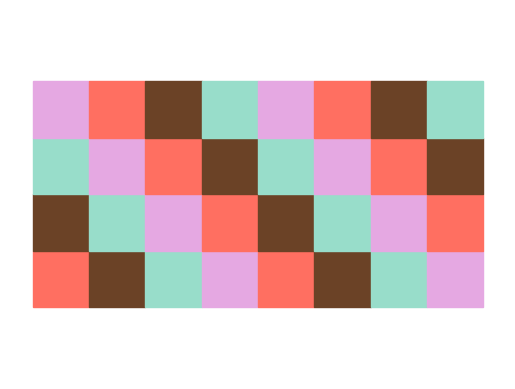

In [7]:
# 1) Match the comments in teh cod the lines or sections of the following code
# the comments are not in the  order the code is

# 2) Check the matplotlib documentation add add a black border to each square

## Create a figure and axis
## Turn off axis labels and ticks
## Set axis limits and show the plot
## Iterate through rows and columns to create rectangles
## Calculate the position of the rectangle
## Add a rectangle to the plot with the specified color
## Call the function with a 4x8 grid
## Define the colors you want to use


import matplotlib.pyplot as plt

def create_colored_grid(rows, cols):
  ## Create a figure and axis
    fig, ax = plt.subplots()
  ## Define the colors you want to use
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']
  ## Iterate through rows and columns to create rectangles
    for i in range(rows):
        for j in range(cols):
  ## Calculate the position of the rectangle
            x = j
            y = i
  ## Add a rectangle to the plot with the specified color
            ax.add_patch(plt.Rectangle((x, y), 1, 1, color=colors[(i + j) % len(colors)], edgecolor="black"))
  ## Set axis limits and show the plot
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    plt.axis('equal')
  ## Turn off axis labels and ticks
    plt.axis('off')
    plt.show()

  ## Call the function with a 4x8 grid
create_colored_grid(4, 8)

# Share a screenshot of your answer at tinyurl.com/gerry507jam1

Great now that we understand how to use matplotlib within a function, lets think about how we could use, custom classes to add the rectangles instead.

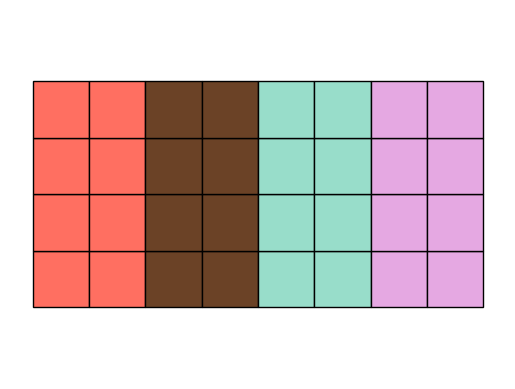

In [12]:

# Create a user-defined class called ColoredRectangles with a method called draw
# what input arguments are needed?
# if you need help - check misorderd lines of the necessary code
# at the following link: tinyurl.com/ColoredRectParsons


class ColoredRectangle:
  def __init__(self,x,y,color):
    self.x = x
    self.y = y
    self.color = color
  def draw(self, ax):
     ax.add_patch(plt.Rectangle((self.x, self.y), 1, 1, facecolor= self.color, edgecolor = 'black'))



def create_colored_grid(rows, cols):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Define stylish pastel colors
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']

    # Create rectangles with List Comprehension
    colored_rect = [ColoredRectangle(x,y, color=colors[x//2]) for x in range(8) for y in range(4)]

    for rect in colored_rect:
      rect.draw(ax) # Draw the rectangle

    ax.set_xlim(0, cols)     # Set axis limits after drawing rectangles
    ax.set_ylim(0, rows)

    # Set equal aspect ratio, turn off axis labels and ticks, and show the plot
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Call the function with a 4x8 grid
create_colored_grid(4, 8)


Now, that we have some 'districts' lets create some citizens - lets randomly place a red or blue circle in each square.  Check the matplotlib documentation for how to plot a circle instead of a rectangle. What input arguments do you ahve to modify? Lets share our answers at

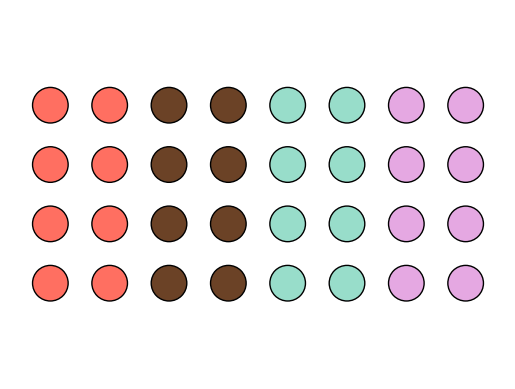

In [17]:
from random import random
class Precinct:
  def __init__(self,x,y,color):
    self.x = x
    self.y = y
    self.color = color
  def draw(self, ax):
     ax.add_patch(plt.Circle((self.x, self.y), radius = .3, facecolor= self.color, edgecolor = 'black'))



def create_colored_grid(rows, cols):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Define stylish pastel colors
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']

    # Create rectangles with List Comprehension
    colored_rect = [Precinct(x,y, color=colors[x//2]) for x in range(8) for y in range(4)]

    for rect in colored_rect:
      rect.draw(ax)# Draw the rectangle

    ax.set_xlim(0, cols)     # Set axis limits after drawing rectangles
    ax.set_ylim(0, rows)

    # Set equal aspect ratio, turn off axis labels and ticks, and show the plot
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Call the function with a 4x8 grid
create_colored_grid(4, 8)



Now we have an ability to graphically represent districts, precincts and voters. Its really easy visually, to figure out what districts are majority red and majority blue.  How could we test out different districts of equivalent size to find the most advantage for red or blue districts. Imagine we have a much bigger grid than 4x8. What are the data that we need to keep track of? What are the steps to test out different combinations?  Lets brainstrom for a few minutes at [tinyurl.com/gerry507jam3](https://tinyurl.com/gerry507jam3)


<ipython-input-17-192a6a7be620>:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, y), 1, 1, color=colors[(i + j) % len(colors)], edgecolor='black'))


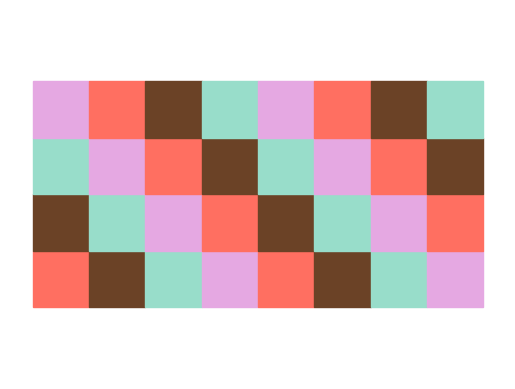

In [ ]:
import matplotlib.pyplot as plt

def create_colored_grid(rows, cols):
    fig, ax = plt.subplots()     # Create a figure and axis
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']     # Define the colors you want to see
    for i in range(rows):     # Iterate through rows and columns to create rectangles
        for j in range(cols):
            x = j             # Calculate the position of the rectangle
            y = i
            # Add a rectangle to the plot with the specified color
            ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=colors[(i + j) % len(colors)], edgecolor='black'))
    ax.set_xlim(0, cols)     # Set axis limits and show the plot
    ax.set_ylim(0, rows)
    plt.axis('equal')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

create_colored_grid(4, 8) # Call the function with a 4x8 grid


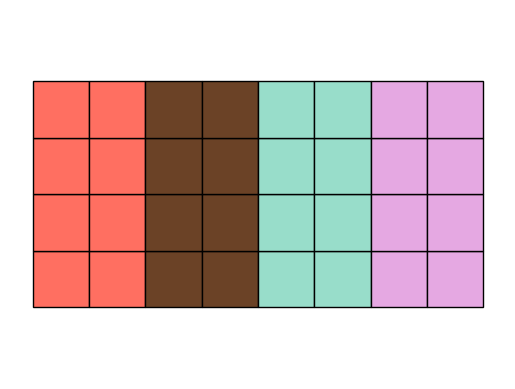

In [ ]:

# Create a user-defined class called ColoredRectangles with a method called draw
# what input arguments are needed?
class ColoredRectangle:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

    def draw(self, ax):
        rectangle = plt.Rectangle((self.x, self.y), 1, 1, facecolor=self.color, edgecolor='black')
        ax.add_patch(rectangle)

def create_colored_grid(rows, cols):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Define stylish pastel colors
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']

    # Create rectangles with List Comprehension
    colored_rect = [ColoredRectangle(x,y, color=colors[x//2]) for x in range(8) for y in range(4)]

    for rect in colored_rect:
      rect.draw(ax) # Draw the rectangle

    # Set equal aspect ratio, turn off axis labels and ticks, and show the plot
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Call the function with a 4x8 grid
create_colored_grid(4, 8)


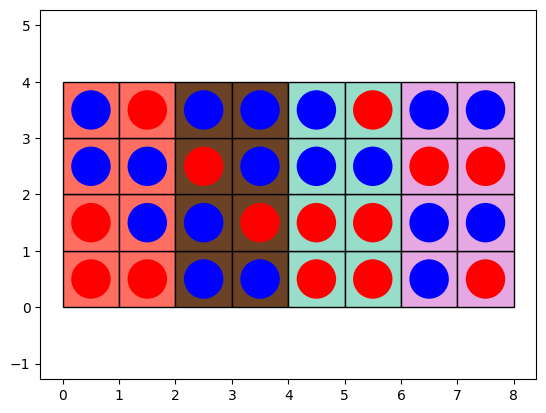

In [ ]:

# Create a user-defined class called ColoredRectangles with a method called draw
# what input arguments are needed?
import random as random
class Precinct:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

    def draw(self, ax):
        rectangle = plt.Rectangle((self.x, self.y), 1, 1, facecolor=self.color, edgecolor='black')
        ax.add_patch(rectangle)

class Voters:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
    def draw(self, ax):
        ax.add_patch(plt.Circle((self.x, self.y), radius = .35, facecolor=self.color))

def create_colored_grid(rows, cols):
    fig, ax = plt.subplots()
    colors = ['#FF6F61', '#6B4226', '#98DDCA', '#E5A8E2']
    precincts = [Precinct(x,y, color=colors[x//2]) for x in range(8) for y in range(4)]
    for rect in precincts:
      rect.draw(ax) # Draw the rectangle

    electorate = [Voters(a+.5,b+.5, color = random.choice(["Blue", "Red"])) for a in range(8) for b in range(4)]
    for v in electorate:
      v.draw(ax)
    plt.axis('equal')
    plt.show()
create_colored_grid(4, 8)

In [ ]:
random.choice([1, 5])

5